# HydroBench: Hydrological Model Benchmarking and Diagnostics

Authors: 

> >   **Edom Moges<sup>1</sup>, Ben Ruddell<sup>2</sup>, Liang Zhang<sup>1</sup>, Jessica Driscoll<sup>3</sup>, Parker Norton<sup>3</sup>, Fernando Perez<sup>1</sup>, and Laurel Larsen<sup>1</sup>  **

<sup>1</sup> University of California, Berkeley

<sup>2</sup> Northern Arizona University

<sup>3</sup> United States Geological Survey

>   [Environmental Sytems Dynamics Laboratory (ESDL)](https://www.esdlberkeley.com/)
               University of California, Berkeley 

>
     ==================================================================================
     --------------------***********************************************---------------
     ==================================================================================

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#HydroBench:-Hydrological-Model-Benchmarking-and-Diagnostics" data-toc-modified-id="HydroBench:-Hydrological-Model-Benchmarking-and-Diagnostics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>HydroBench: Hydrological Model Benchmarking and Diagnostics</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Notebook-description" data-toc-modified-id="Notebook-description-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Notebook description</a></span></li><li><span><a href="#Acknowledgements" data-toc-modified-id="Acknowledgements-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Acknowledgements</a></span></li></ul></li><li><span><a href="#Load-Libraries" data-toc-modified-id="Load-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Libraries</a></span></li><li><span><a href="#Load-the-watershed-observed-and-model-data" data-toc-modified-id="Load-the-watershed-observed-and-model-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the watershed observed and model data</a></span></li><li><span><a href="#Predictive-(statistical)-model-performance-metrics" data-toc-modified-id="Predictive-(statistical)-model-performance-metrics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Predictive (statistical) model performance metrics</a></span><ul class="toc-item"><li><span><a href="#Hydrograph-and-Statistical-metrics" data-toc-modified-id="Hydrograph-and-Statistical-metrics-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Hydrograph and Statistical metrics</a></span></li><li><span><a href="#Summary-table-of-predictive-performances" data-toc-modified-id="Summary-table-of-predictive-performances-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Summary table of predictive performances</a></span></li></ul></li><li><span><a href="#Hydrological-Signature-based-Model-Diagnostics" data-toc-modified-id="Hydrological-Signature-based-Model-Diagnostics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Hydrological Signature based Model Diagnostics</a></span><ul class="toc-item"><li><span><a href="#Flow-Duration-Curve-(FDC)" data-toc-modified-id="Flow-Duration-Curve-(FDC)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Flow Duration Curve (FDC)</a></span></li><li><span><a href="#Time-linked-Flow-Duration-Curve-(T-FDC)" data-toc-modified-id="Time-linked-Flow-Duration-Curve-(T-FDC)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Time linked Flow Duration Curve (T-FDC)</a></span></li><li><span><a href="#Recession-curves" data-toc-modified-id="Recession-curves-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Recession curves</a></span></li><li><span><a href="#Water-Balance" data-toc-modified-id="Water-Balance-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Water Balance</a></span></li></ul></li><li><span><a href="#Information-theoretic-based-model-benchmarking" data-toc-modified-id="Information-theoretic-based-model-benchmarking-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Information theoretic based model benchmarking</a></span><ul class="toc-item"><li><span><a href="#Executing-the-info-flow-code-for-the-watershed" data-toc-modified-id="Executing-the-info-flow-code-for-the-watershed-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Executing the info-flow code for the watershed</a></span></li><li><span><a href="#Interpreting-the-MI-and-TE-results-for-model-diagnostics" data-toc-modified-id="Interpreting-the-MI-and-TE-results-for-model-diagnostics-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Interpreting the MI and TE results for model diagnostics</a></span><ul class="toc-item"><li><span><a href="#Tradeoff-between-functional-and-predictive-model-performances" data-toc-modified-id="Tradeoff-between-functional-and-predictive-model-performances-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Tradeoff between functional and predictive model performances</a></span></li><li><span><a href="#Process-Network-plots" data-toc-modified-id="Process-Network-plots-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Process Network plots</a></span></li></ul></li></ul></li></ul></div>

## Introduction

Hydrological model performances are commonly evaluated based on different statistical metrics e.g., the Nash Sutcliffe 
coefficient ([NSE](https://en.wikipedia.org/wiki/Nash%E2%80%93Sutcliffe_model_efficiency_coefficient)). However, these metrics 
do not reveal neither the hydrological consistency of the model nor the model's functional performances, such as how different 
flux and store variables interact within the model. As such, they are poor in model diagnostics and fail to indicate whether 
the model is right for the right reason. In contrast, hydrological process signatures and information theoretic metrics are 
capable of revealing the hydrological consistency of the model prediction and model internal functions respectively. In this 
notebook, we demonstrate the use of interactive and reproducible comprehensive model benchmarking and diagnostic using:

1) a set of statistical predictive performance metrics: Nash Sutcliffe coefficient, Kling and Gupta coefficient, percent bias and pearson correlation coefficient

2) a set of hydrological process based signatures: flow duration curve, recession curve, time-linked flow duration curve, and runoff coefficient, and

3) information theoretic based metrics, particularly [Transfer Entropy (TE)](https://en.wikipedia.org/wiki/Transfer_entropy) and [Mutual Information(MI)](https://en.wikipedia.org/wiki/Mutual_information). 

We demonstrate the application of these metrics on the the National Hydrologic Model product using the PRMS model ([NHM-PRMs](https://www.sciencebase.gov/catalog/item/58af4f93e4b01ccd54f9f3da)). 
NHM-PRMS has two model products covering the CONUS - the calibrated and uncalibrated model products. 
Out of the CONUS wide NHM-PRMS products, this notebook focused on the NHM-PRMS product at the 
[Cedar River, WA](https://waterdata.usgs.gov/nwis/nwismap/?site_no=12115000&agency_cd=USGS). 

## Notebook description

This notebook has four steps:

1. Loading the calibrated and uncalibrated NHM-PRMS model product (Section 3)
2. Interactively evaluating model performances using predictive performance metrics (Section 4)
3. Diagnosing model performance using hydrological process signatures (Section 5),
3. Executing information theoretic based model performance evaluation to understand (Section 6): 


    i. tradeoffs between predictive and function model performance (Section 6.2)
    ii. model internal function using process network plots of Tranfer Entropy (Section 6.3)


## Acknowledgements

This work is supported by the NSF Earth Cube Program under awards 1928406 and 1928374, the Moore Foundation and the Powell Center USGS.

# Load Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy
import os
import glob
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.lines import Line2D
import ipywidgets
from termcolor import colored


import sys
import time
import random
import os
import math
import pickle
from matplotlib import cm

import xarray as xr
import numcodecs
import zarr

from joblib import Parallel, delayed

from pandas.plotting import register_matplotlib_converters
from matplotlib import rcParams
rcParams["font.size"]=14
plt.rcParams.update({'figure.max_open_warning': 0})
register_matplotlib_converters()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
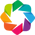

In [2]:
import holoviews as hv
from holoviews import opts, dim
from bokeh.plotting import show, output_file
hv.extension("bokeh", "matplotlib")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
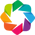

In [3]:
## Local function
sys.path.insert(1, './Functions')

from PN1_5_RoutineSource import *
from ProcessNetwork1_5MainRoutine_sourceCode import *
from plottingUtilities_Widget import *

In [4]:
# local file paths
np.random.seed(50)
pathData = (r"./Data/")
pathResult = (r"./Result/")

# Load the watershed observed and model data 

This notebook uses a specific standard data input format. The standard data input format is a tab delimited .txt file. The column names are specified in the following cell.

In order to apply to a different dataset, please adopt and follow the standard data format. 

Two products of the NHM-PRMS are loaded:
1. the calibrated NHM-PRMS model product - in this model version, the model parameters are mathematically optimized.
2. the uncalibrated NHM-PRMS model product - in this model version, the model parameters are estimated based on their physical interpretation.

In [5]:
FName = [12115000]# Additional NHM-PRMS USGS stations:[10296000, 1105600, 12414900, 14141500, 2482550, 13340600]
k = 0
nameFCalib = str(FName[k]) +'_Calibrated.statVar' 
nameFunCalib =  str(FName[k]) +'_unCalibrated.statVar' 

In [6]:
# NHM PRMS simulation results names - TableHeader
TableHeader = ['observed_Q','basin_ppt','basin_tmin','basin_tmax','model_Q','basin_soil_moist','basin_snowmelt','basin_actet','basin_potet']
# Calibrated model
CalibMat = np.loadtxt(pathData+ nameFCalib, delimiter='\t') # cross validate with matlab
#CalibMat[0:5,:]

# Uncalibrated model
UnCalibMat = np.loadtxt(pathData+ nameFunCalib, delimiter='\t') # cross validate with matlab
#UnCalibMat[0:5,:]

In [7]:
startD = '1980-10-01'
endD = '2016-09-30'
dateTimeD = pd.date_range(start=startD, end=endD)
#plt.plot(dateTimeD, CalibMat[:,0])

# Predictive (statistical) model performance metrics

This section demonstrates model evaluation based on the most common hydrological  model predictive performance measures- the Nash Sutcliffe coefficient (NSE), Kling-gupta (KGE), Percent Bias (PBIAS) and Pearson Correlation Coefficient. Two versions of these metrics are adopted - the untransformed and their log trasformed version. These two metrics are suited to evaluate model predictive perormance in capturing the different segments of a hydrograph. For instance,

1. Untransformed Nash-Sutcliffe coefficeint (NSE) - as an L2-norm, NSE is biased towards high flow predictive performance. This makes NSE suited for evaluating model's performance in capturing high flows.
2. Log transformed Nash-Sutcliffe coefficeint (logNSE) - biased towards predictive performance of low flows. This makes logNSE suited for evaluating models's performance in capturing low flows.

Interactive widgets are used to reveal the comparative performance of the calibrated and uncalibrated model performance using the above two common predictive performance measures. 

## Hydrograph and Statistical metrics
The ipywidges below demonstrates the use of interactive computation particularly to a two version model. It can easily be adopted to a model with multiple model versions.

The main function is in this ipywidgets is PredictivePerformance(.). It has inputs of:
1. nameFCalib - the calibrated model table
2. nameFunCalib - the uncalibrated model table
3. obsQCol and modQCol - column identifier for observed and model streamflow
4. ModelVersion - defines which alternative model version is being plotted and evaluated e.g., calibrated or uncalibrated.
5. PerformanceMetrics - performace metrics being displayed.
6. MetricTransformation- defines logarithm transformation or untranformed data

All-in-one table containing all of the predictive performance metrics are provided in the next cell. 

In [8]:
Traditional_widget = ipywidgets.interactive(
    PredictivePerformance,
    
    nameFCalib = nameFCalib, 
    nameFunCalib = nameFunCalib, 
    obsQCol = 0, 
    modQCol = 4,
    
    ModelVersion = ipywidgets.ToggleButtons(
        options=['Calibrated', 'Uncalibrated'],
        description='Model Version:',
        disabled=False,
        button_style='',
        tooltips=['Model paramters are mathematically optimized.', 'Model parameters are estimated based on their physical interpretation.']
        ),
   
    PerformanceMetrics = ipywidgets.ToggleButtons(
        options=['NSE', 'KGE', 'PBIAS', 'r'],
        description='Performance Metric:',
        disabled=False,
        button_style='',
        tooltips=['Biased towards high flows.', 'Biased towards low flows.']
        ),
    
    MetricTransformation = ipywidgets.ToggleButtons(
        options=['Untransformed', 'Logarithmic'],
        description='Metric Transformation:',
        disabled=False,
        button_style='',
        tooltips=['Biased towards high flows.', 'Biased towards low flows.']
        )
    
    
)
Traditional_widget

interactive(children=(ToggleButtons(description='Model Version:', options=('Calibrated', 'Uncalibrated'), tool…

**Please click over the interactive widget buttons to compare the performances of the different versions of the model and the performance measures**

## Summary table of predictive performances

In [9]:
CalibratedModelPredictive = PredictivePerformanceSummary(CalibMat[:,0],CalibMat[:,4]) # Column 0 and 4 imply observed and predicted streamflow.
CalibratedModelPredictive

NSE       KGE     PBIAS         r
Untransformed Flow   0.495792  0.661070  2.603306  0.840056
logTransformed Flow  0.692020  0.850342       NaN  0.852296

In [10]:
UnCalibratedModelPredictive = PredictivePerformanceSummary(UnCalibMat[:,0],UnCalibMat[:,4])
UnCalibratedModelPredictive

NSE       KGE     PBIAS         r
Untransformed Flow   0.764085  0.848761 -0.345735  0.875033
logTransformed Flow  0.775174  0.786555       NaN  0.895008

# Hydrological Signature based Model Diagnostics

This section provides model diagnostics based on a selected hydrological signatures such as:
1. Flow duration curve
2. Streamflow recession curves
3. Water balance (runoff coefficient)

## Flow Duration Curve (FDC)
The main function in plotting flow duration is plot_FDC(.). It require an input of observed or model streamflow.

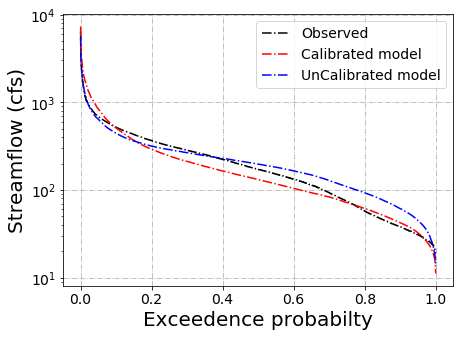

In [11]:
plt.figure(figsize=[7,5]) #10,4
plot_FDC(CalibMat[:,0], 'Observed','k-.', ' (cfs)') 
plot_FDC(CalibMat[:,4], 'Calibrated model', 'r-.', ' (cfs)'  )
plot_FDC(UnCalibMat[:,4], 'UnCalibrated model', 'b-.', ' (cfs)'  )

## Time linked Flow Duration Curve (T-FDC)

T-FDC is a confusion matrix analog based on binning. T-FDC tracks over and underestimation of a given day's observed streamflow by the model depending on the bin it is located. The bins are defined based on observed streamflow with a user specified bin number. Thus, T-FDC is close to FDC but it has a time component as it tracks each timestep (e.g., daily). Thus, in performance evaluation, ideally, high number of occurrences (Frequency which is represented by hot colors in the heatmaps) needs to populate the diagonal - observed and predicted streamflow being in the same bin. That means, there is low over and unde-restimation of the hydrograph by the model.

The main function that plots T-FDC is timeLinkedFDC(.). It has inputs of:
1. observed and modeled streamflow. 
2. Flag - is used to identify the binnig method with F=1 being Equal width, Flag=2 Equal Area, Flag=3 Equal Frequency binning.
3. Figure dimesions and titles.

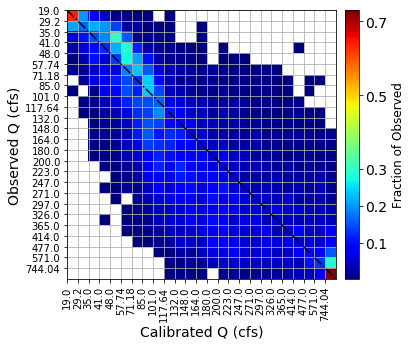

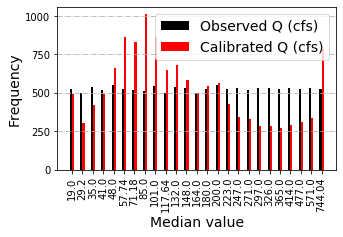

In [12]:
binSize = 25
obs = CalibMat[:,0]
mod = CalibMat[:,4]
Flag = 3 # Binning method Equal 1 width, 2 Area, 3 depth (frequency) Frequency
ticks = [0,0.1,0.2, 0.3,0.5,0.7, 0.9]

timeLinkedFDC(obs, mod,binSize,Flag,[5,5], [5,3], 'Observed Q (cfs)', 'Calibrated Q (cfs)',
              ticks) #[7,7], [7.5,4]

## Recession curves

Recession curves are imprints of the subsurface flow process. They capture the dynamics of streamflow as it is mostly driven by storage (absence of precipitation). 

The main function plotting recession curves is plotRecession. It has inputs of:
1. ppt - precipitation data
2. Q - streamflow data
3. dateTime - timestamp
4. Season - For which season a recession curve is plotted. 
         i. winter covers October to March (Note, this Months can be adjusted based on user preference in the source function)
         ii. Summer covers April to September (Note, this Months can be adjusted based on user preference in the source function)
         iii. All covers the entire year 

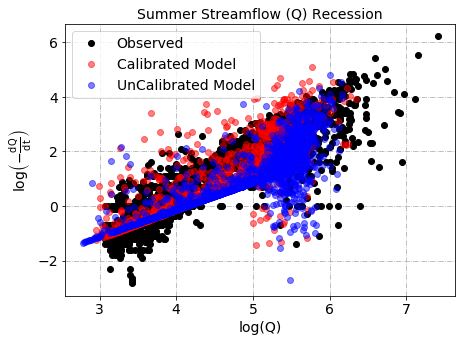

In [13]:
plt.figure(figsize=[7,5]) #10,4, Winter, Summer, All
Season = 'Summer' #Winter, Summer, All
plotRecession(CalibMat[:,1], CalibMat[:,0],dateTimeD, 'Streamflow (Q) Recession','ko',
              'Observed',season = Season, alpha=1)
plotRecession(CalibMat[:,1], CalibMat[:,4],dateTimeD,'Streamflow (Q) Recession','ro',
              'Calibrated Model',season = Season,alpha=.5)
plotRecession(UnCalibMat[:,1], UnCalibMat[:,4],dateTimeD,'Streamflow (Q) Recession','bo',
              'UnCalibrated Model',season = Season,alpha=.5)

## Water Balance

Annual Runoff coefficients (RC) are used as a signature measure of model's capacity in capturing annual water balance. Compared to process networks (PN - section 7.2.2) that quantify information flow, RC quantfies how much mass is transfered from Precipitation to streamflow. 

The main function in computaing RC is AnnualRunoffCoefficient(.) with the inputs of:
1. a table with precipitation, observed and model streamflow.
2. DateTime defining time stamp

In [14]:
tableCal = pd.DataFrame(data = CalibMat[:,(1,0,4)], columns=['basinPPT','ObsQ', 'ModelQ'],
                        index=dateTimeD)
tableUnCal = pd.DataFrame(data = UnCalibMat[:,(1,0,4)], columns=['basinPPT','ObsQ', 'ModelQ'],
                        index=dateTimeD)

In [15]:
# Compute annual and total runoff coefficients
Ann_CalR_obs, Tot_CalR_obs = AnnualRunoffCoefficient(tableCal,None,None,'basinPPT','ObsQ')
Ann_CalR_Mod, Tot_CalR_Mod = AnnualRunoffCoefficient(tableCal,None,None,'basinPPT','ModelQ')

Ann_UnCalR_obs, Tot_UnCalR_obs = AnnualRunoffCoefficient(tableUnCal,None,None,'basinPPT','ObsQ')
Ann_UnCalR_Mod, Tot_UnCalR_Mod = AnnualRunoffCoefficient(tableUnCal,None,None,'basinPPT','ModelQ')

 Calibrated Runoff Coeffcient Ratio (modR/ObsR) = 0.969 
 Uncalibrated Runoff Coeffcient Ratio (modR/ObsR) =  1.003


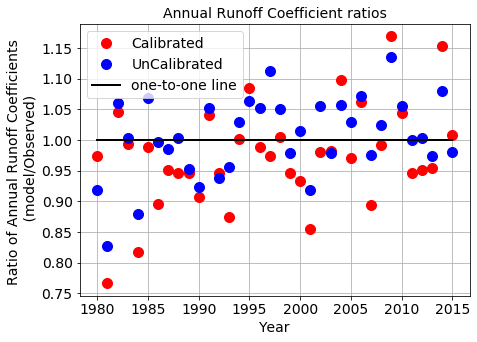

In [16]:
plt.figure(figsize=[7,5])
plt.plot(Ann_CalR_Mod[:,0], Ann_CalR_Mod[:,1]/Ann_CalR_obs[:,1],'ro',label ='Calibrated',markersize=10)
plt.plot(Ann_UnCalR_Mod[:,0], Ann_UnCalR_Mod[:,1]/Ann_UnCalR_obs[:,1],'bo',label ='UnCalibrated',markersize=10)

plt.plot((np.min(Ann_CalR_obs[:,0]), np.max(Ann_CalR_obs[:,0])), 
         (1, 1),  linewidth=2, color='k', label='one-to-one line')
plt.xlabel('Year',fontsize=14)
plt.ylabel('Ratio of Annual Runoff Coefficients \n (model/Observed)',fontsize=14)
plt.title('Annual Runoff Coefficient ratios',fontsize=14)
plt.legend(fontsize=14)
plt.grid()
print(' Calibrated Runoff Coeffcient Ratio (modR/ObsR) =', np.round(Tot_CalR_Mod/Tot_CalR_obs,3),'\n',
      'Uncalibrated Runoff Coeffcient Ratio (modR/ObsR) = ', np.round(Tot_UnCalR_Mod/Tot_UnCalR_obs,3))

# Information theoretic based model benchmarking 

Two model diagnostics are undertaken using information theoretic concepts. They are:

1. understanding the tradeoffs between predictive and functional model performances.
2. understanding model internal functions that lead to the predictive performance.

Achieving the above two undertakings, require computations of Mutual Information (MI) and Transfer Entropy (TE). While MI is used as a predictive performance metrics, TE is used as an indicator of model functional performance. 

The computation of MI and TE requires different [joint](https://en.wikipedia.org/wiki/Joint_probability_distribution) and [marginal](https://en.wikipedia.org/wiki/Marginal_distribution) probabilities of the various flux and store hydrological variables referred in the input table header. In order to compute these probabilities, we used histogram based probability estimation. 

Histogram based probabilities require defining:

1. the number of bins (*nBins*) used to develop the histogram,
2. how to handle higher and lower extreme values in the first and last bins of the histogram (*low and high binPctlRange*). 

In order to understand the sensitivity of TE and MI to *nBins* and *low and high binPctlRange*, interactive widgets are used. 

Hydrological time series are seasonal, e.g., seasonality driving both precipitation and streamflow. This seasonal signal may interfere with the actual information flow signal between two variables (e.g., information flow from precipitation to streamflow).  As such, MI and TE values are sensitive to the seasonality of the hydrological time series (flux and store variables).In order remove the seasonal signal effect on MI and TE, this notebook computes MI and TE values based on the anomaly time series. The anomaly time series removes the seasonal signal of any store and flux variable by subtracting the long term mean of the day of the year average (DOY) from each time series measurement. 

In computing the long term DOY average, 'long term' is a relative quantity - particularly in the face of non-stationarity. Therefore, we allow choosing different 'long term' time lengths in computing DOY. 
This choice can be set using the interactive widget (*AnomalyLength*). 

In order to evaluate the statistical significance of MI and TE, we shuffle the flux and store variables repeatedly. For each repeated shuffle sample, we compute both TE and MI. Out of these repeated shuffle based MI and TE, we compute their 95 percentile as a statistical threshold (TE critical) to be surpassed by the actual MI and TE to be statistically significant. Here, as the 95% is sensitive to the number of repeated shuffles (*nTests*), we implemented interactive widget to understand this sensitivity.  

We used interactive widgets to understand the sensitivity of TE/MI to these factors. These factors are abbreviated as follows.
>
1. ***nBins*** - the number of bins to be used in computing MI and TE
2. ***UpperPerct*** - upper percentile of the data to be binned
3. ***LowerPerct*** - lower percentile of the data to be binned
4. ***TransType*** - defines the options whether to perform MI and TE computation based on the anomaly time series or the raw data time series. Two options are implemented. (option 0 - raw data) and (option 1 - anomaly tranform)
5. ***AnomalyLength*** - length of 'long term' in computing DOY average for annomal time series generation.
6. ***nTests*** - the number of shuffles to be used in computing the 95% statistical threshold.

 

## Executing the informtion theoretic code 

In setting up the info-flow computation, the following basic info-theoretic options can be left to their default values. For understanding TE/MI sensitivity, please refer to the interactive widgets below. 

In [17]:
optsHJ= {'SurrogateMethod': 2, # 0 no statistical testing, 1 use surrogates from file, 2 surrogates using shuffling, 3 IAAF method
        'NoDataCode': -9999,
        'anomalyPeriodInData' : 365 , # set it to 365 days in a year or 24 hours in a day #### 365days/year
        'anomalyMovingAveragePeriodNumber': 5, # how many years for computing mean for the anomaly ***
        'trimTheData' : 1,  #% Remove entire rows of data with at least 1 missing value? 0 = no, 1 = yes (default)
        'transformation' : 1 } # % 0 = apply no transformation (default), 1 = apply anomaly filter ***

In [18]:
# TE inputs 
optsHJ['doEntropy'] = 1
optsHJ['nTests'] = 100 # Number of surrogates (shuffles) to compute statistical significance (default = 300) ***
optsHJ['oneTailZ'] = 1.66
optsHJ['nBins'] = np.array([11]).astype(int) # ***
optsHJ['lagVect'] = np.arange(0,20) # lag days
optsHJ['SurrogateTestEachLag'] = 0
optsHJ['binType'] = 1 # 0 = don't do classification (or data are already classified), 1 = classify using locally bounded bins (default), 2 = classify using globally bounded bins
optsHJ['binPctlRange'] = [0, 99] # ***

# Input files and variable names
optsHJ['files'] =  ['./Data/'+nameFunCalib] #nameFCalib #nameFunCalib
optsHJ['varSymbols'] = TableHeader
optsHJ['varUnits'] = TableHeader
optsHJ['varNames'] = TableHeader

# parallelization
optsHJ['parallelWorkers'] = 16 # parallelization on lags H and TE for each lag on each core.

# Saving results and preprocessed outputs
optsHJ['savePreProcessed'] = 0
optsHJ['preProcessedSuffix'] = '_preprocessed'
optsHJ['outDirectory'] = './Result/'
optsHJ['saveProcessNetwork'] = 1 
optsHJ['outFileProcessNetwork'] = 'Result'

# optsHJ['varNames']


In [19]:
# Define Plotting parameters
popts = {}
popts['testStatistic'] = 'TR' # Relative transfer intropy T/Hy
popts['vars'] = ['basin_ppt','model_Q'] # source followed by sink
popts['SigThresh'] = 'SigThreshTR' # significance test critical value
popts['fi'] = [0]
popts['ToVar'] = ['model_Q']
#popts

In [20]:
#ipywidgets
def WidgetInfoFlowMetricsCalculator(TransType, AnomalyLength, nTests, nBins, UpperPct, LowerPct):
    optsHJ['transformation'] = TransType
    optsHJ['anomalyMovingAveragePeriodNumber'] = AnomalyLength
    optsHJ['nTests'] = nTests
    optsHJ['nBins'] = np.array([nBins]).astype(int)
    optsHJ['binPctlRange'] = [LowerPct, UpperPct]
    
    
    CouplingAndInfoFlowPlot(optsHJ,popts) 


In [21]:
%%time
InfoFlowWidgetPlotter = ipywidgets.interactive(
    WidgetInfoFlowMetricsCalculator,
    
    TransType = ipywidgets.IntSlider(min=0, max=1, value=1),
    AnomalyLength = ipywidgets.IntSlider(min=0, max=10, value=5),
    nTests = ipywidgets.IntSlider(min=10, max=1000, value=10),
    nBins = ipywidgets.IntSlider(min=5, max=15, value=11),
    UpperPct = ipywidgets.IntSlider(min=90, max=100, value=99),
    LowerPct = ipywidgets.IntSlider(min=0, max=10, value=0) 
    

)
InfoFlowWidgetPlotter

Wall time: 67.7 ms


interactive(children=(IntSlider(value=1, description='TransType', max=1), IntSlider(value=5, description='Anom…

**Below are the sensitivity analysis widgets. Please use the sliding widgets to interact with the different options and values**

## Interpreting the MI and TE results for model diagnostics

This section demonstrates the interpretation and use of the info-flow results to diagnose model performances in understanding the tradeoff between predictive and functional performance and revealing model internal functions in generating the predictive performance.  

In [22]:
# Loading Info-flow Results for further Interpretation

RCalib = pd.read_pickle(r'./Result/Result_R.pkl')
optsHJCal = pd.read_pickle(r'./Result/Result_opts.pkl')

### Tradeoff between functional and predictive model performances

Model development and parameter optimization can lead to tradeoffs between functional and predictive performances. In the figure below x-axis refers to model functional performance (the difference between observed and model information flow from input precipitation to output streamflow) while predictive model performance refers to the mutual information between observed and modeled streamflow. 

The ideal model should have MI=1. (or  1-MI = 0) and TE<sub>model</sub> - TE<sub>observed</sub> = 0. As such, the (0,0) coordinate is the ideal model location.

In contrast, 
1. a model in the right panel (TE<sub>model</sub> - TE<sub>observed</sub> > 0) is an overly deterministic model - i.e., a model that abstracts more information from input precipitation than the observed.
2. a model in the left panel (TE<sub>model</sub> - TE<sub>observed</sub> < 0) is a random model - i.e., a model that extracts poorly information from input precipitation compared to the observation.


As it is shown in the above TE/MI results, TE and MI are computed at different lags. The lags refer to the timestep by which the source variable is lagged in relation to the sink variable. The sink variable refers to model streamflow estimate (model_Q) while the remaining store/flux variable are source variables.

The interactive widget below offers an opportunity to understand the performance tradeoff of the model at the different lag timesteps. 

In [23]:
def plot_widgetPerformanceTradeoff(Lag, xmin=None, xmax=None, ymin=None, ymax=None):
    
    plotPerformanceTradeoff(Lag, RCalib, 'Calibrated', 'Cedar River','basin_ppt', 'observed_Q')   

In [24]:
%matplotlib inline
PerformanceTradeoff_widget = ipywidgets.interactive(
    plot_widgetPerformanceTradeoff,
   
    Lag =ipywidgets.IntSlider(min=0, max=15, value=0),
    xmin=ipywidgets.FloatText(value=-0.1),
    xmax=ipywidgets.FloatText(value=0.2),
    ymin=ipywidgets.FloatText(value=0),
    ymax=ipywidgets.FloatText(value=1)
)
PerformanceTradeoff_widget

interactive(children=(IntSlider(value=0, description='Lag', max=15), FloatText(value=-0.1, description='xmin')…

In [25]:
# Plotting all in one functional and predictive performance metrics

In [26]:
plotPerformanceTradeoffNoFigure(0, RCalib, 'Calibrated', 'Cedar River','basin_ppt', 'observed_Q')

Watershed  Functional Performance (TEmod - TEobs)  \
0  Cedar River                                 0.05278   

   Predictive Performance (1-MI)  
0                        0.64062

In [27]:
CalibTradOff = pd.DataFrame(np.nan, columns= ['Precipitation','Min Temperature','Max Temperature'],
            index = ['1-MI','TEmod - TEobs'])

# The numbers below are a result of executing the function: 
# plotPerformanceTradeoffNoFigure(0, RCalib, 'Calibrated', 'Cedar River','basin_tmin', 'observed_Q') as in the above cell.
# change the source variable and model versions to obtain all numbers.
CalibTradOff.iloc[0,:] = [0.736606,0.736606,0.736606] 
CalibTradOff.iloc[1,:] = [0.074643,-0.0033,0.001584]
CalibTradOff

Precipitation  Min Temperature  Max Temperature
1-MI                0.736606         0.736606         0.736606
TEmod - TEobs       0.074643        -0.003300         0.001584

In [28]:
UnCalibTradOff = pd.DataFrame(np.nan, columns= ['Precipitation','Min Temperature','Max Temperature'],
            index = ['1-MI','TEmod - TEobs'])
UnCalibTradOff.iloc[0,:] = [0.64062,0.64062,0.64062]
UnCalibTradOff.iloc[1,:] = [0.05278, -0.003062,0.000258]
UnCalibTradOff

Precipitation  Min Temperature  Max Temperature
1-MI                 0.64062         0.640620         0.640620
TEmod - TEobs        0.05278        -0.003062         0.000258

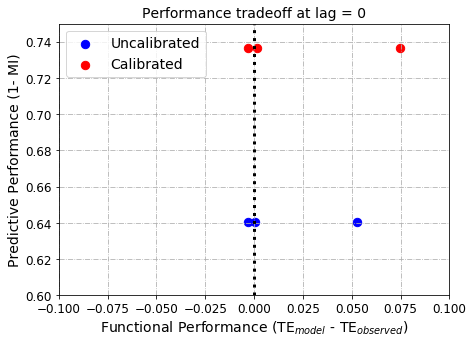

In [29]:
plt.figure(figsize=[7,5])
Ms= 70
plt.scatter(UnCalibTradOff.iloc[1,:],UnCalibTradOff.iloc[0,:],s=Ms , color= 'b',label= 'Uncalibrated')
plt.scatter(CalibTradOff.iloc[1,:], CalibTradOff.iloc[0,:], s=Ms, color = 'r', label= 'Calibrated')

plt.axvline(x=0,color = 'k',ls=':', lw = 3)
plt.xlabel('Functional Performance (TE$_{model}$ - TE$_{observed}$)', size=14)
plt.ylabel('Predictive Performance (1- MI)', size = 14)
plt.grid(linestyle='-.')
plt.title('Performance tradeoff at lag = ' + str(0), size =14) 
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlim([-0.1,0.1])
plt.ylim([0.6,0.75])
plt.legend(fontsize=14)
plt.show()

### Process Network plots

Process Networks (PN) offer platform of presenting model internal functions based on transfer entropy.
Similar to the above widgets, the process network plot below is generated at different lag timesteps. Please use the interactive widgets to reveal model internal 'wiring' at the different lags considered. 

The PN variables and their direction are defined by the user depending on the availability of observations and expert knowledge.

In [30]:
def generateChordPlots2(R,optLag,optsHJ,modelVersion):
    
    CalTR = R['TR'][0,optLag,:,:] # 0 file number, lags, from, to
    CalibChord = pd.DataFrame(data=CalTR, columns=optsHJ['varNames'], index=optsHJ['varNames'])
    
    # Excluding variables from PN plots.
    dfCal = CalibChord.drop(columns=['observed_Q'],index=['observed_Q'], axis=[0,1]) # 'basin_potet'
    
    # Set the diagonals to zero for the chord plot so that there is no self TE
    np.fill_diagonal(dfCal.values, 0) # no self TE
    
    # Rename Variable names for better plotting
    dfCal.columns = ['Precipitation','Min Temperature','Max Temperature','Streamflow','Soil Moisture','Snow melt','Actual ET', 'Potential ET']
    dfCal.index = ['Precipitation','Min Temperature','Max Temperature','Streamflow','Soil Moisture','Snow melt','Actual ET', 'Potential ET']
   
    # set exceptions based on physical principles
    dfCal.loc[:,'Min Temperature']=int(0)
    dfCal.loc[:,'Max Temperature']=int(0)
    dfCal.loc[:,'Precipitation']=int(0)
    dfCal.loc[('Streamflow'),:]=int(0)
    
    dfCal.loc[('Actual ET'),('Streamflow','Snow melt','Potential ET')]=int(0) # set all to 0?????
    dfCal.loc['Potential ET',('Streamflow','Snow melt')]=int(0)
    
    dfCal.loc['Soil Moisture','Snow melt']=int(0)
    dfCal.loc['Precipitation',('Actual ET','Potential ET')]=int(0)
    dfCal.loc['Snow melt',('Actual ET','Potential ET')]=int(0)
    
    
    
        # Calibrated chord diagram
    dataCal = hv.Dataset((list(dfCal.columns), list(dfCal.index), (dfCal.T*1000).astype(int)),
                  ['source', 'target'], 'value').dframe()
    
     # Now create your Chord diagram from the flattened data
    #plt.title('Uncalibrated')
    chord_Cal = hv.Chord(dataCal)
    chord_Cal.opts(title=modelVersion,
        node_color='index', edge_color='source', label_index='index', 
        cmap='Category10', edge_cmap='Category10', width=500, height=500)
    
    show(hv.render(chord_Cal) )
    print(dfCal)

In [31]:
def plot_widgetProcessNetworkChord(Lag):
    
    generateChordPlots2(RCalib,Lag,optsHJ,'UnCalibrated') # lag=0 #str(nameFCalib)
    

In [32]:
PN_Chord_widget = ipywidgets.interactive(
        plot_widgetProcessNetworkChord,
   
    Lag = ipywidgets.IntSlider(min=0, max=15, value=0)
)
PN_Chord_widget

interactive(children=(IntSlider(value=0, description='Lag', max=15), Output()), _dom_classes=('widget-interact…